In [1]:
import numpy as np
from keras import layers, models
from keras.utils import to_categorical
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

In [7]:
train_data.shape
len(train_data[0])

28

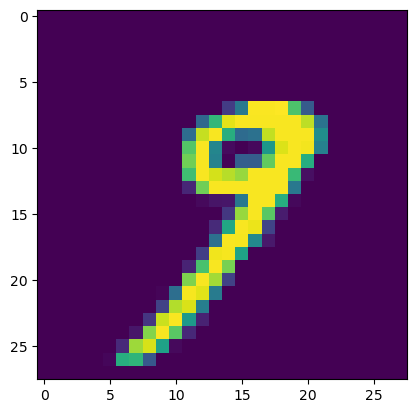

In [5]:
plt.imshow(train_data[33])

In [3]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
model.add(layers.Dense(10, activation='softmax'))


In [4]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics='accuracy')

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [6]:
x_train = train_data.reshape((60000, 28*28))
x_train = np.float32(x_train)/255

x_test = test_data.reshape((10000, 28*28))
x_test = np.float32(x_test)/255

In [7]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [8]:
train_labels[0]

5

In [9]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [10]:
model.fit(x_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 7s 12ms/step - loss: 0.2565 - accuracy: 0.9257
Epoch 2/5
469/469 [==============================] - 6s 12ms/step - loss: 0.1051 - accuracy: 0.9686
Epoch 3/5
469/469 [==============================] - 6s 14ms/step - loss: 0.0692 - accuracy: 0.9792
Epoch 4/5
469/469 [==============================] - 7s 14ms/step - loss: 0.0497 - accuracy: 0.9848
Epoch 5/5
469/469 [==============================] - 6s 12ms/step - loss: 0.0378 - accuracy: 0.9885


In [11]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0690 - accuracy: 0.9778


[0.06902065873146057, 0.9778000116348267]